In [ ]:
import numpy as np
import pandas as pd
from os.path  import join
%matplotlib inline
import random
import matplotlib.pyplot as plt
import struct
from array import array
from tensorflow import keras
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz


--2024-09-16 14:19:55--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  50.1MB/s    in 3.7s    

2024-09-16 14:19:59 (44.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
base_dir = "cifar-10-batches-py"

In [ ]:
data_train = []
labels_train = []
for i in range(1,6):
    data_dir = "data_batch_"+str(i)
    data_dict = unpickle(join(base_dir,data_dir))
    data_train.append(data_dict[b'data'])
    labels_train.append(data_dict[b'labels'])

data_train = np.concatenate(data_train)
labels_train = np.concatenate(labels_train)

In [ ]:
data_test_dic = unpickle(join(base_dir,"test_batch"))
data_test = data_test_dic[b'data']
labels_test = data_test_dic[b'labels']

data_test = np.array(data_test)
labels_test = np.array(labels_test)

In [ ]:
data_train = data_train.reshape((50000, 3, 32, 32))
data_test = data_test.reshape((10000, 3, 32, 32))

data_train = data_train.transpose((0, 2, 3, 1))
data_test = data_test.transpose((0, 2, 3, 1))

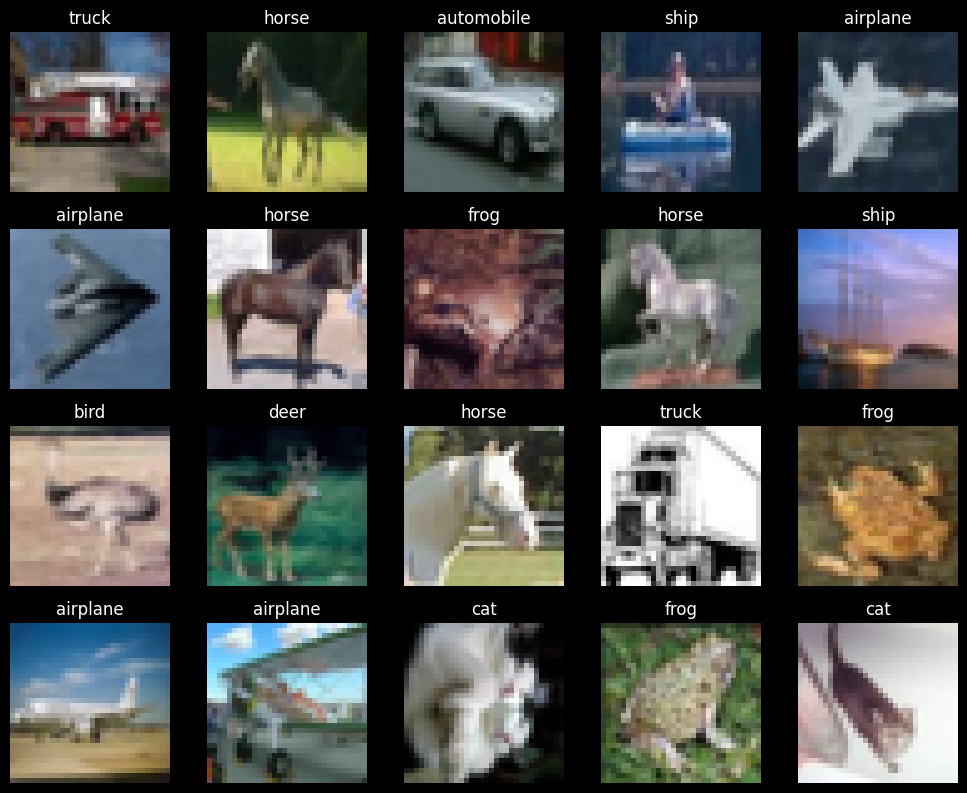

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize = (10,10))
for i in range(20):
  index = random.randint(0, len(data_train) - 1)
  image = data_train[index]
  plt.subplot(5,5,i+1)
  plt.imshow(image)
  plt.title(label_names[labels_train[index]])
  #change title color
  plt.gca().title.set_color('white')
  plt.axis('off')
plt.tight_layout()
#change figure background
plt.gcf().set_facecolor('black')
plt.show()


In [ ]:
labels_train =  labels_train)
labels_test =  labels_test

In [ ]:

model = keras.models.Sequential([
    keras.layers.Input((32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 554,794 (2.12 MB)

 Trainable params: 554,794 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model_cnn
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model_cnn
history_cnn = model.fit(data_train, labels_train, epochs=100, batch_size=128, validation_split=0.2)

# Evaluate the model_cnn
test_loss, test_acc = model.evaluate(data_test, labels_test)
print('Test accuracy:', test_acc)

In [ ]:
plt.figure(figsize=(20, 5))

# Primeiro gráfico (Loss)
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Loss do Modelo', color='white')  # Cor do título
plt.ylabel('Loss', color='white')           # Cor do label do eixo Y
plt.xlabel('Épocas', color='white')         # Cor do label do eixo X
plt.legend(['Train', 'Val'], loc='upper left')

# Mudar cor dos eixos para branco
ax = plt.gca()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Segundo gráfico (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Acurácia do Modelo', color='white')
plt.ylabel('Acurácia', color='white')
plt.xlabel('Épocas', color='white')
plt.legend(['Train', 'Val'], loc='upper left')

# Mudar cor dos eixos para branco
ax = plt.gca()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Alterar a cor do fundo da figura principal
plt.gcf().set_facecolor('black')

plt.show()


In [ ]:
# Fazer previsões nos dados de teste
y_pred = np.argmax(model.predict(data_test), axis=1)
y_test = np.argmax(labels_test, axis=1)

# Fazer previsões para o treino
y_pred_train = np.argmax(model.predict(data_train), axis=1)
y_train = np.argmax(labels_train, axis=1)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm_treino = confusion_matrix(y_train, y_pred_train)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supondo que você já tenha a matriz de confusão 'cm' e os rótulos 'label_names'
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

# Criar a visualização da matriz de confusão
fig, ax = plt.subplots()
disp_test.plot(cmap=plt.cm.Blues, ax=ax)

# Alterar o fundo do gráfico para preto
ax.set_facecolor('black')

# Alterar a cor das bordas do gráfico (spines) para branco
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Alterar as cores dos rótulos dos eixos (labels)
ax.set_xlabel('Predicted Label', color='white')
ax.set_ylabel('True Label', color='white')

# Alterar a cor dos ticks e dos tick labels para branco
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Alterar o título para branco
plt.title('Matriz de Confusão do Modelo', color='white')

# Alterar o fundo da figura principal para preto
plt.gcf().set_facecolor('black')

plt.show()


In [ ]:
#classificacion report
print(classification_report(y_test, y_pred, target_names=label_names))

In [ ]:
disp_treino = ConfusionMatrixDisplay(confusion_matrix=cm_treino, display_labels=label_names)

# Criar a visualização da matriz de confusão
fig, ax = plt.subplots()
disp_treino.plot(cmap=plt.cm.Blues, ax=ax)

# Alterar o fundo do gráfico para preto
ax.set_facecolor('black')

# Alterar a cor das bordas do gráfico (spines) para branco
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Alterar as cores dos rótulos dos eixos (labels)
ax.set_xlabel('Predicted Label', color='white')
ax.set_ylabel('True Label', color='white')

# Alterar a cor dos ticks e dos tick labels para branco
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Alterar o título para branco
plt.title('Matriz de Confusão do Modelo', color='white')

# Alterar o fundo da figura principal para preto
plt.gcf().set_facecolor('black')

plt.show()


In [ ]:
print(classification_report(y_train, y_pred_train, target_names=label_names))